# 🧠 Neural Network Fundamentals
## Part 2: The First Committee Member - A Single Neuron

---

*"One brave committee member steps up to make the first attempt at our classification task."*

---


In **Part 0 & 1** (`neural_network_fundamentals.ipynb`), we learned:
- Why fundamentals matter and met "The Brain's Decision Committee"
- How matrices represent data (images are just grids of numbers!)
- The **dot product** - the heart of pattern matching
- How matrix multiplication lets multiple "detectors" work at once

Now it's time to meet our first **committee member** - a single **artificial neuron**. This humble **neuron** is the building block of all neural networks, from simple classifiers to the most advanced AI systems.

### What You'll Learn in Part 2

1. **The Biological Inspiration** - How real neurons inspired artificial ones
2. **Anatomy of a Neuron** - Inputs, Weights, Bias, and the Weighted Sum
3. **Building Our First Neuron** - From scratch, step by step
4. **Connecting to Our Mission** - How a neuron "sees" vertical vs horizontal lines

### Prerequisites
Make sure you've completed Part 0 & 1 first! You should understand:
- What a matrix is and how images are matrices
- The dot product and what it measures
- Why we flatten 2D images into 1D vectors


---

## Setup: Import Dependencies

Run this cell first to import all required libraries.


In [2]:
# =============================================================================
# SETUP: Import our tools
# =============================================================================
# Run this cell first! Everything else depends on these imports.

import numpy as np                    # For numerical operations (matrices, math)
import matplotlib.pyplot as plt       # For visualization
import matplotlib.patches as patches  # For drawing shapes
from matplotlib.colors import LinearSegmentedColormap  # Custom colormaps
from IPython.display import display, clear_output, HTML  # For notebook display

# Try to import ipywidgets (optional - some features won't work without it)
try:
    import ipywidgets as widgets
    WIDGETS_AVAILABLE = True
except ImportError:
    WIDGETS_AVAILABLE = False
    print("⚠️  ipywidgets not installed. Interactive features will be limited.")
    print("   Install with: pip install ipywidgets")

# Configure matplotlib for better-looking plots
style_options = ['seaborn-v0_8-whitegrid', 'seaborn-whitegrid', 'ggplot', 'default']
for style in style_options:
    try:
        plt.style.use(style)
        break
    except OSError:
        continue

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14

# Set random seed for reproducibility
np.random.seed(42)

# =============================================================================
# Re-create our line images from Part 1
# =============================================================================
# These are the images our neural network will learn to classify

vertical_line = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
])

horizontal_line = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
])

print(" All libraries imported successfully!")
print(f"   NumPy version: {np.__version__}")
print("\n Part 2: The First Committee Member - A Single Neuron")
print("   Let's meet our first neuron!")


 All libraries imported successfully!
   NumPy version: 2.3.1

 Part 2: The First Committee Member - A Single Neuron
   Let's meet our first neuron!


C:\Users\asggm\AppData\Local\Temp\ipykernel_1600\146142507.py:68: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asggm\AppData\Local\Temp\ipykernel_1600\146142507.py:68: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asggm\AppData\Local\Temp\ipykernel_1600\146142507.py:68: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asggm\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asggm\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asggm\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning

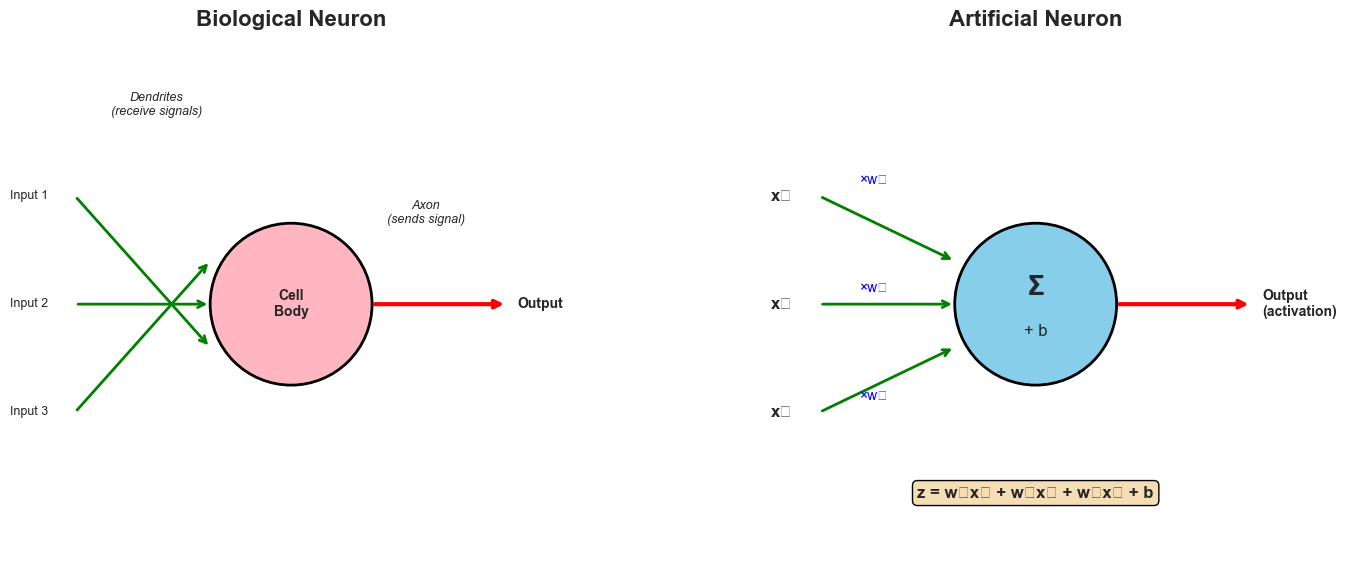

 Notice the similarity!
   Both receive multiple inputs, weight them differently, sum them up,
   and produce an output based on that sum.


In [3]:
# =============================================================================
# Visualizing the Biological vs Artificial Neuron
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Biological Neuron (simplified diagram)
ax = axes[0]
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Biological Neuron', fontsize=16, fontweight='bold')

# Cell body
circle = plt.Circle((5, 5), 1.5, color='#FFB6C1', ec='black', linewidth=2)
ax.add_patch(circle)
ax.text(5, 5, 'Cell\nBody', ha='center', va='center', fontsize=10, fontweight='bold')

# Dendrites (inputs)
for i, (x, y) in enumerate([(1, 7), (1, 5), (1, 3)]):
    ax.annotate('', xy=(3.5, 5 + (i-1)*0.8), xytext=(x, y),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    ax.text(x-0.5, y, f'Input {i+1}', ha='right', va='center', fontsize=9)

# Axon (output)
ax.annotate('', xy=(9, 5), xytext=(6.5, 5),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))
ax.text(9.2, 5, 'Output', ha='left', va='center', fontsize=10, fontweight='bold')

# Labels
ax.text(2.5, 8.5, 'Dendrites\n(receive signals)', ha='center', fontsize=9, style='italic')
ax.text(7.5, 6.5, 'Axon\n(sends signal)', ha='center', fontsize=9, style='italic')

# Right: Artificial Neuron
ax = axes[1]
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Artificial Neuron', fontsize=16, fontweight='bold')

# Neuron circle
circle = plt.Circle((5, 5), 1.5, color='#87CEEB', ec='black', linewidth=2)
ax.add_patch(circle)
ax.text(5, 5.3, 'Σ', ha='center', va='center', fontsize=20, fontweight='bold')
ax.text(5, 4.5, '+ b', ha='center', va='center', fontsize=12)

# Inputs with weights
inputs = ['x₁', 'x₂', 'x₃']
weights = ['w₁', 'w₂', 'w₃']
for i, (inp, w) in enumerate(zip(inputs, weights)):
    y_pos = 7 - i * 2
    ax.annotate('', xy=(3.5, 5 + (1-i)*0.8), xytext=(1, y_pos),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    ax.text(0.5, y_pos, inp, ha='right', va='center', fontsize=12, fontweight='bold')
    ax.text(2, y_pos + 0.3, f'×{w}', ha='center', va='center', fontsize=10, color='blue')

# Output
ax.annotate('', xy=(9, 5), xytext=(6.5, 5),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))
ax.text(9.2, 5, 'Output\n(activation)', ha='left', va='center', fontsize=10, fontweight='bold')

# Formula
ax.text(5, 1.5, 'z = w₁x₁ + w₂x₂ + w₃x₃ + b', ha='center', va='center', 
        fontsize=12, fontweight='bold', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

print(" Notice the similarity!")
print("   Both receive multiple inputs, weight them differently, sum them up,")
print("   and produce an output based on that sum.")


---

## 2.3 Inputs: What the Neuron Sees

For our line detection problem, the input is a 3×3 image. But neurons work with **1D vectors**, not 2D matrices. So we need to **flatten** the image.

### Flattening: 2D → 1D

```
Original 3×3 Image:          Flattened Vector:
┌───┬───┬───┐
│ 0 │ 1 │ 2 │                [0, 1, 2, 3, 4, 5, 6, 7, 8]
├───┼───┼───┤         →      
│ 3 │ 4 │ 5 │                Position mapping:
├───┼───┼───┤                Row 0: positions 0, 1, 2
│ 6 │ 7 │ 8 │                Row 1: positions 3, 4, 5
└───┴───┴───┘                Row 2: positions 6, 7, 8
```

### Why Flatten?

1. **Mathematical convenience** - Dot products work on vectors
2. **Flexibility** - The same neuron code works for any input size
3. **Standard practice** - This is how all fully-connected layers work

Let's see this in action with our line images:


VERTICAL LINE (3x3 matrix):
[[0 1 0]
 [0 1 0]
 [0 1 0]]

Flattened to 1D vector:
[0 1 0 0 1 0 0 1 0]
Shape: (9,) (9 elements)


HORIZONTAL LINE (3x3 matrix):
[[0 0 0]
 [1 1 1]
 [0 0 0]]

Flattened to 1D vector:
[0 0 0 1 1 1 0 0 0]
Shape: (9,) (9 elements)


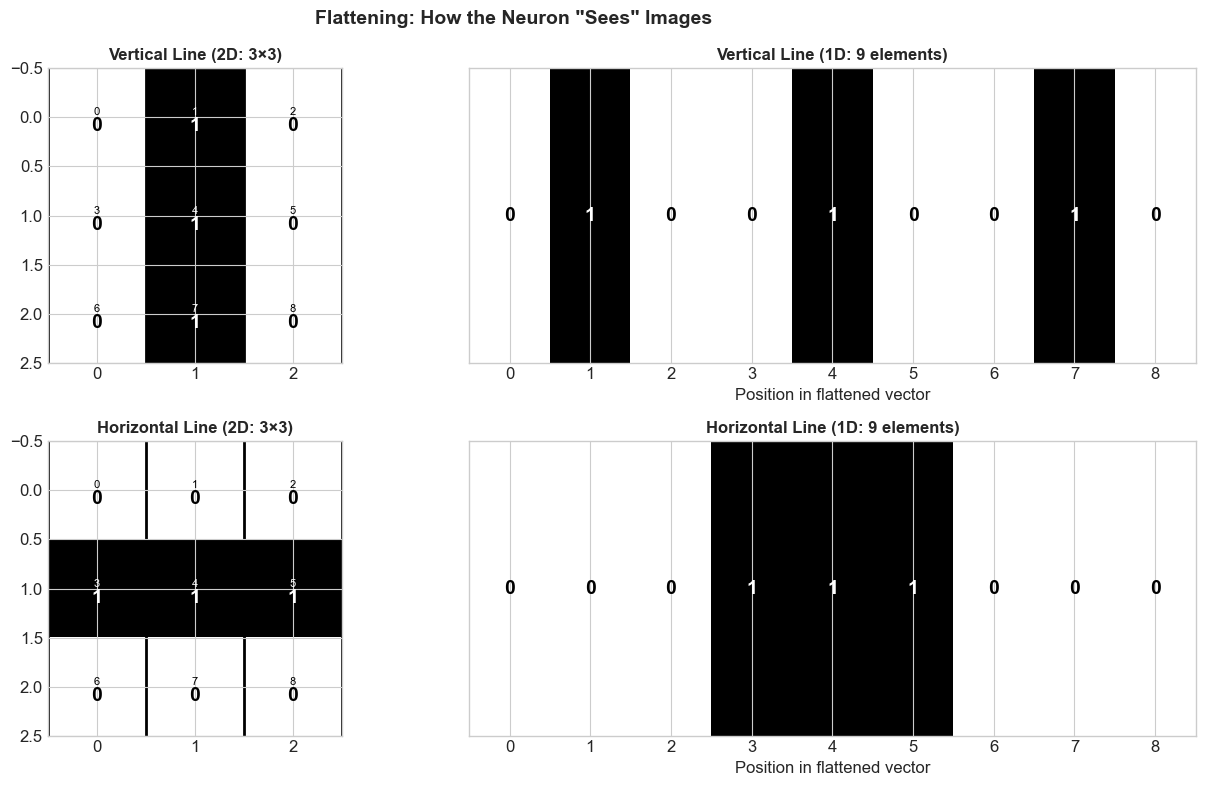


 Key Insight: The neuron sees the image as a list of 9 numbers.
   Position 1, 4, 7 are the middle column (vertical line)
   Position 3, 4, 5 are the middle row (horizontal line)
   Let's make sure we're following along unti now becasue the diagram above gives us a good mental model
   of how nurons interpret higher dimentional data.


In [9]:
# =============================================================================
# Flattening Images: 2D to 1D
# =============================================================================

print("VERTICAL LINE (3x3 matrix):")
print(vertical_line)

# Flatten the image
vertical_flat = vertical_line.flatten()
print(f"\nFlattened to 1D vector:")
print(vertical_flat)
print(f"Shape: {vertical_flat.shape} (9 elements)")

print("\n" + "="*50)

print("\nHORIZONTAL LINE (3x3 matrix):")
print(horizontal_line)

horizontal_flat = horizontal_line.flatten()
print(f"\nFlattened to 1D vector:")
print(horizontal_flat)
print(f"Shape: {horizontal_flat.shape} (9 elements)")

# Visualize the flattening process
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for row, (img_2d, img_1d, name) in enumerate([
    (vertical_line, vertical_flat, "Vertical"),
    (horizontal_line, horizontal_flat, "Horizontal")
]):
    # 2D image
    ax = axes[row, 0]
    ax.imshow(img_2d, cmap='gray_r', vmin=0, vmax=1)
    ax.set_title(f'{name} Line (2D: 3×3)', fontsize=12, fontweight='bold')
    ax.set_xticks(np.arange(-0.5, 3, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 3, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    for i in range(3):
        for j in range(3):
            val = img_2d[i, j]
            color = 'white' if val > 0.5 else 'black'
            # Show position number
            ax.text(j, i, f'{i*3+j}', ha='center', va='bottom', color=color, fontsize=8)
            ax.text(j, i, f'{int(val)}', ha='center', va='top', color=color, fontsize=14, fontweight='bold')
    
    # 1D flattened
    ax = axes[row, 1]
    ax.imshow(img_1d.reshape(1, -1), cmap='gray_r', vmin=0, vmax=1, aspect='auto')
    ax.set_title(f'{name} Line (1D: 9 elements)', fontsize=12, fontweight='bold')
    ax.set_yticks([])
    for i in range(9):
        val = img_1d[i]
        color = 'white' if val > 0.5 else 'black'
        ax.text(i, 0, f'{int(val)}', ha='center', va='center', color=color, fontsize=14, fontweight='bold')
    ax.set_xticks(range(9))
    ax.set_xlabel('Position in flattened vector')

plt.suptitle('Flattening: How the Neuron "Sees" Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Key Insight: The neuron sees the image as a list of 9 numbers.")
print("   Position 1, 4, 7 are the middle column (vertical line)")
print("   Position 3, 4, 5 are the middle row (horizontal line)")
print("   Let's make sure we're following along unti now becasue the diagram above gives us a good mental model\n   of how nurons interpret higher dimentional data.")


---

## 2.4 Weights: What Matters Most

Weights are the **learnable parameters** of a neuron. They determine what the neuron "pays attention to."

### How to Think About Weights

| Weight Value | Meaning |
|--------------|---------|
| **Large positive** (+1, +2) | "This input strongly suggests the answer is YES" |
| **Small positive** (+0.1, +0.2) | "This input slightly suggests YES" |
| **Zero** (0) | "I don't care about this input" |
| **Small negative** (-0.1, -0.2) | "This input slightly suggests NO" |
| **Large negative** (-1, -2) | "This input strongly suggests NO" |

### For Our Vertical Line Detector

If we want a neuron to detect **vertical lines**, it should have:
- **High weights** for the middle column (positions 1, 4, 7)
- **Low/zero weights** for other positions

```
Perfect Vertical Detector Weights (as 3×3 grid):
┌─────┬─────┬─────┐
│  0  │ +1  │  0  │     Position 1: High weight
├─────┼─────┼─────┤
│  0  │ +1  │  0  │     Position 4: High weight
├─────┼─────┼─────┤
│  0  │ +1  │  0  │     Position 7: High weight
└─────┴─────┴─────┘
```

### Committee Analogy
*"The weights are the committee member's priorities. A vertical line detector has high priority for evidence in the middle column because that's where vertical lines appear."*

### The Problem: We Don't Know the Right Weights Yet!

In practice, we don't hand-design weights. We:
1. **Start with random weights** (the neuron doesn't know anything yet)
2. **Show it examples** with correct answers
3. **Let it learn** the right weights through training

For now, let's manually set "good" weights to understand how they work:


In [10]:
# =============================================================================
# Understanding Weights
# =============================================================================

# "Perfect" weights for detecting vertical lines
# High values in positions 1, 4, 7 (middle column)
weights_vertical_detector = np.array([0, 1, 0, 0, 1, 0, 0, 1, 0])

# "Perfect" weights for detecting horizontal lines  
# High values in positions 3, 4, 5 (middle row)
weights_horizontal_detector = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0])

# Random weights (what a neuron starts with before training)
np.random.seed(42)
weights_random = np.random.randn(9) * 0.5  # Small random values

print("Different weight configurations:")
print("\n1. Vertical Line Detector (hand-designed):")
print(f"   Weights: {weights_vertical_detector}")
print(f"   As 3×3 grid:\n{weights_vertical_detector.reshape(3,3)}")

print("\n2. Horizontal Line Detector (hand-designed):")
print(f"   Weights: {weights_horizontal_detector}")
print(f"   As 3×3 grid:\n{weights_horizontal_detector.reshape(3,3)}")

print("\n3. Random Weights (before training):")
print(f"   Weights: {np.round(weights_random, 2)}")
print(f"   As 3×3 grid:\n{np.round(weights_random.reshape(3,3), 2)}")


Different weight configurations:

1. Vertical Line Detector (hand-designed):
   Weights: [0 1 0 0 1 0 0 1 0]
   As 3×3 grid:
[[0 1 0]
 [0 1 0]
 [0 1 0]]

2. Horizontal Line Detector (hand-designed):
   Weights: [0 0 0 1 1 1 0 0 0]
   As 3×3 grid:
[[0 0 0]
 [1 1 1]
 [0 0 0]]

3. Random Weights (before training):
   Weights: [ 0.25 -0.07  0.32  0.76 -0.12 -0.12  0.79  0.38 -0.23]
   As 3×3 grid:
[[ 0.25 -0.07  0.32]
 [ 0.76 -0.12 -0.12]
 [ 0.79  0.38 -0.23]]


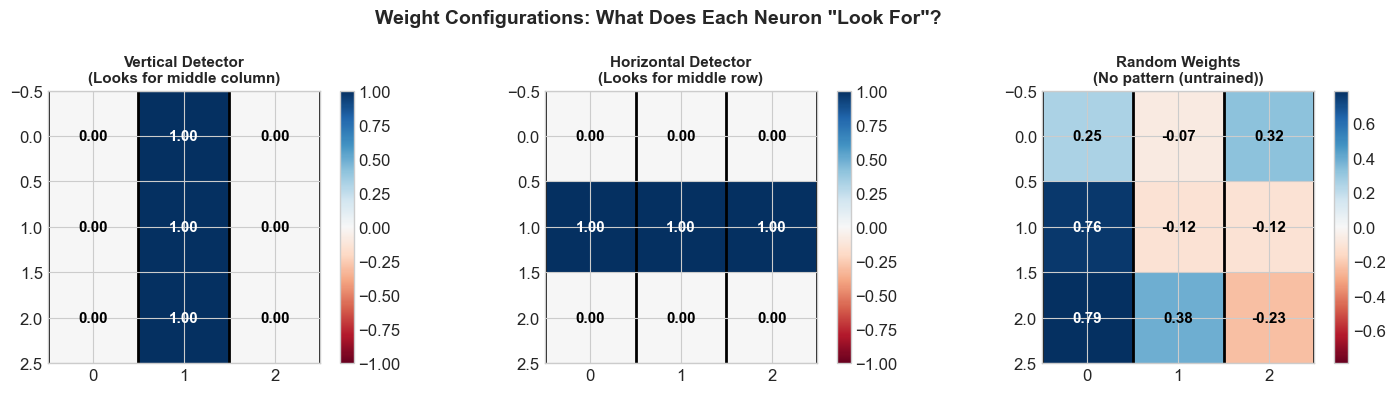

🔍 Color Guide:
   Blue = Positive weight (input suggests YES)
   Red = Negative weight (input suggests NO)
   White = Zero/small weight (input doesn't matter)


In [11]:
# =============================================================================
# Visualizing Different Weight Configurations
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

weight_configs = [
    (weights_vertical_detector, "Vertical Detector", "Looks for middle column"),
    (weights_horizontal_detector, "Horizontal Detector", "Looks for middle row"),
    (weights_random, "Random Weights", "No pattern (untrained)")
]

for ax, (weights, title, desc) in zip(axes, weight_configs):
    weights_2d = weights.reshape(3, 3)
    
    # Use diverging colormap to show positive (blue) vs negative (red)
    vmax = max(abs(weights.min()), abs(weights.max()))
    im = ax.imshow(weights_2d, cmap='RdBu', vmin=-vmax, vmax=vmax)
    
    ax.set_title(f'{title}\n({desc})', fontsize=11, fontweight='bold')
    ax.set_xticks(np.arange(-0.5, 3, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 3, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    
    for i in range(3):
        for j in range(3):
            val = weights_2d[i, j]
            color = 'white' if abs(val) > vmax * 0.5 else 'black'
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', 
                   color=color, fontsize=11, fontweight='bold')
    
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.suptitle('Weight Configurations: What Does Each Neuron "Look For"?', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔍 Color Guide:")
print("   Blue = Positive weight (input suggests YES)")
print("   Red = Negative weight (input suggests NO)")
print("   White = Zero/small weight (input doesn't matter)")


---

## 2.5 The Weighted Sum: Combining Evidence

Now we combine inputs and weights using the **dot product** (which you mastered in Part 1!).

### The Formula

```
z = w · x = w₁×x₁ + w₂×x₂ + ... + w₉×x₉
```

This gives us a single number that represents how well the input matches what the neuron is looking for.

### Interpretation

| Weighted Sum (z) | Meaning |
|------------------|---------|
| **Large positive** | Input strongly matches what neuron looks for |
| **Near zero** | Input is neutral (doesn't match or anti-match) |
| **Large negative** | Input is the opposite of what neuron looks for |

### Let's Calculate It

Using our vertical detector weights and both line images:


In [12]:
# =============================================================================
# Computing the Weighted Sum (Dot Product)
# =============================================================================

# Using the vertical detector
weights = weights_vertical_detector

print("VERTICAL DETECTOR analyzing both images:")
print("="*60)

# Test on vertical line
print("\n1. Vertical Image:")
print(f"   Input (x):   {vertical_flat}")
print(f"   Weights (w): {weights}")

# Step-by-step calculation
products = vertical_flat * weights
print(f"\n   Element-wise products: {products}")
weighted_sum_vertical = np.sum(products)
print(f"   Sum (z = w·x): {weighted_sum_vertical}")

# Test on horizontal line
print("\n" + "-"*60)
print("\n2. Horizontal Image:")
print(f"   Input (x):   {horizontal_flat}")
print(f"   Weights (w): {weights}")

products_h = horizontal_flat * weights
print(f"\n   Element-wise products: {products_h}")
weighted_sum_horizontal = np.sum(products_h)
print(f"   Sum (z = w·x): {weighted_sum_horizontal}")

print("\n" + "="*60)
print("RESULTS:")
print(f"   Vertical image → z = {weighted_sum_vertical} (HIGH - matches!)")
print(f"   Horizontal image → z = {weighted_sum_horizontal} (LOW - doesn't match)")
print("="*60)


VERTICAL DETECTOR analyzing both images:

1. Vertical Image:
   Input (x):   [0 1 0 0 1 0 0 1 0]
   Weights (w): [0 1 0 0 1 0 0 1 0]

   Element-wise products: [0 1 0 0 1 0 0 1 0]
   Sum (z = w·x): 3

------------------------------------------------------------

2. Horizontal Image:
   Input (x):   [0 0 0 1 1 1 0 0 0]
   Weights (w): [0 1 0 0 1 0 0 1 0]

   Element-wise products: [0 0 0 0 1 0 0 0 0]
   Sum (z = w·x): 1

RESULTS:
   Vertical image → z = 3 (HIGH - matches!)
   Horizontal image → z = 1 (LOW - doesn't match)


In [13]:
# =============================================================================
# Effect of Bias on Neuron Output
# =============================================================================

# Use vertical detector weights
weights = weights_vertical_detector

# Calculate weighted sum for horizontal image (which doesn't match)
dot_product = np.dot(horizontal_flat, weights)
print(f"Horizontal image with vertical detector:")
print(f"   Weighted sum (w·x) = {dot_product}")
print()

# Try different biases
biases = [-2, -1, 0, 1, 2]
print("Effect of different biases:")
print("-" * 50)

for b in biases:
    z = dot_product + b
    interpretation = "Leaning YES" if z > 0 else "Leaning NO" if z < 0 else "Neutral"
    print(f"   b = {b:+d}: z = {dot_product} + ({b:+d}) = {z:+d}  →  {interpretation}")

print()
print("💡 See how bias can shift the neuron's 'opinion'!")
print("   Even though the horizontal image doesn't match the vertical detector,")
print("   a large positive bias could make the neuron lean towards YES anyway.")


Horizontal image with vertical detector:
   Weighted sum (w·x) = 1

Effect of different biases:
--------------------------------------------------
   b = -2: z = 1 + (-2) = -1  →  Leaning NO
   b = -1: z = 1 + (-1) = +0  →  Neutral
   b = +0: z = 1 + (+0) = +1  →  Leaning YES
   b = +1: z = 1 + (+1) = +2  →  Leaning YES
   b = +2: z = 1 + (+2) = +3  →  Leaning YES

💡 See how bias can shift the neuron's 'opinion'!
   Even though the horizontal image doesn't match the vertical detector,
   a large positive bias could make the neuron lean towards YES anyway.


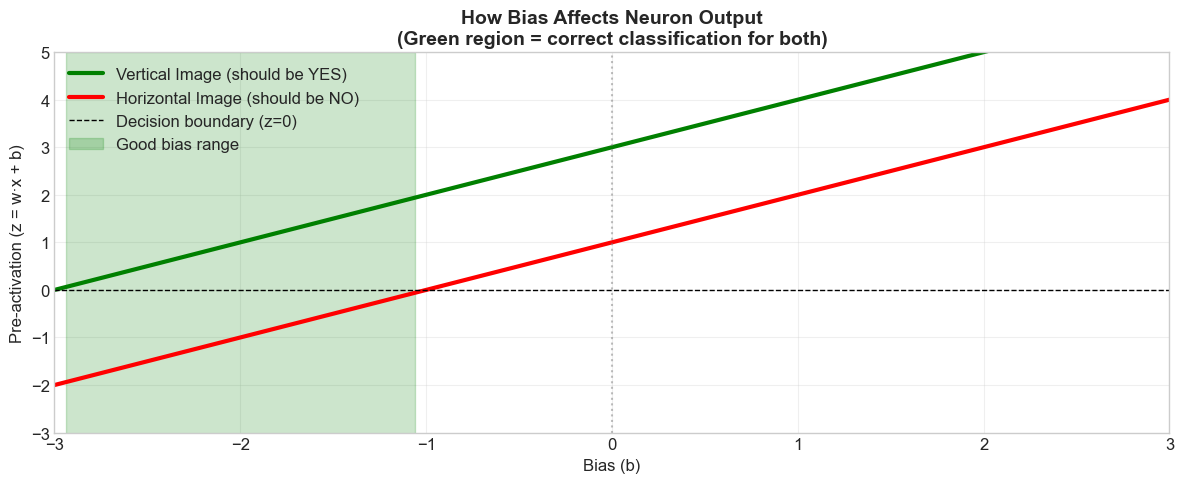

📊 The green shaded region shows bias values where the neuron would
   correctly classify both images (vertical=YES, horizontal=NO).
   In this case, any bias between -3 and 0 works well!


In [14]:
# =============================================================================
# Visualizing the Effect of Bias
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 5))

# Calculate z values for both images across different biases
biases_range = np.linspace(-3, 3, 100)

# For vertical image
z_vertical = np.dot(vertical_flat, weights) + biases_range
# For horizontal image  
z_horizontal = np.dot(horizontal_flat, weights) + biases_range

ax.plot(biases_range, z_vertical, 'g-', linewidth=3, label='Vertical Image (should be YES)')
ax.plot(biases_range, z_horizontal, 'r-', linewidth=3, label='Horizontal Image (should be NO)')
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Decision boundary (z=0)')
ax.axvline(x=0, color='gray', linestyle=':', alpha=0.5)

# Mark good bias region (where vertical > 0 and horizontal < 0)
ax.fill_between(biases_range, -5, 5, where=(z_vertical > 0) & (z_horizontal < 0),
                alpha=0.2, color='green', label='Good bias range')

ax.set_xlabel('Bias (b)', fontsize=12)
ax.set_ylabel('Pre-activation (z = w·x + b)', fontsize=12)
ax.set_title('How Bias Affects Neuron Output\n(Green region = correct classification for both)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 5)

plt.tight_layout()
plt.show()

print("📊 The green shaded region shows bias values where the neuron would")
print("   correctly classify both images (vertical=YES, horizontal=NO).")
print("   In this case, any bias between -3 and 0 works well!")


In [ ]:
# =============================================================================
# Our First Neuron Class (Pre-Activation Only)
# =============================================================================

class SimpleNeuron:
    """
    A single artificial neuron (without activation function yet).
    
    This neuron computes: z = w · x + b
    
    Attributes:
        n_inputs: Number of input features
        weights: Array of weights (one per input)
        bias: Single bias value
    """
    
    def __init__(self, n_inputs, random_init=True):
        """
        Initialize the neuron.
        
        Parameters:
            n_inputs: Number of inputs the neuron will receive
            random_init: If True, use random weights. If False, use zeros.
        """
        self.n_inputs = n_inputs
        
        if random_init:
            # Initialize weights with small random values
            # (This is how real neural networks start!)
            self.weights = np.random.randn(n_inputs) * 0.5
            self.bias = np.random.randn() * 0.1
        else:
            self.weights = np.zeros(n_inputs)
            self.bias = 0.0
    
    def forward(self, x):
        """
        Compute the weighted sum (forward pass).
        
        Parameters:
            x: Input vector (must have length n_inputs)
            
        Returns:
            z: The pre-activation value (weighted sum + bias)
        """
        # Ensure input is a flat array. This is a simple way to make sure the input is a 1D array.
        x = np.array(x).flatten()
        
        # Check dimensions
        if len(x) != self.n_inputs:
            raise ValueError(f"Expected {self.n_inputs} inputs, got {len(x)}")
        
        # Compute weighted sum + bias
        # This is the CORE operation: z = w · x + b
        z = np.dot(self.weights, x) + self.bias
        
        return z
    
    def set_weights(self, weights, bias=None):
        """Manually set weights and bias (useful for testing)."""
        self.weights = np.array(weights)
        if bias is not None:
            self.bias = bias
    
    def __repr__(self):
        return f"SimpleNeuron(n_inputs={self.n_inputs})"


# Let's create and test our neuron!
print("Creating a neuron with 9 inputs (for 3×3 images)...")
neuron = SimpleNeuron(n_inputs=9)

print(f"\n{neuron}")
print(f"\nInitial random weights:")
print(f"   {np.round(neuron.weights, 3)}")
print(f"\nInitial random bias: {neuron.bias:.3f}")


Creating a neuron with 9 inputs (for 3×3 images)...

SimpleNeuron(n_inputs=9)

Initial random weights:
   [-0.706  0.733 -0.113  0.034 -0.712 -0.272  0.055 -0.575  0.188]

Initial random bias: -0.060


In [17]:
# =============================================================================
# Testing Our Neuron with Random Weights
# =============================================================================

print("Testing neuron with RANDOM weights (untrained):")
print("="*60)

# Test on both images
z_vertical = neuron.forward(vertical_flat)
z_horizontal = neuron.forward(horizontal_flat)

print(f"\nVertical image   → z = {z_vertical:.3f}")
print(f"Horizontal image → z = {z_horizontal:.3f}")

print("\n⚠️  Notice: With random weights, the outputs are essentially random!")
print("   The neuron doesn't know what it's looking for yet.")


Testing neuron with RANDOM weights (untrained):

Vertical image   → z = -0.615
Horizontal image → z = -1.011

⚠️  Notice: With random weights, the outputs are essentially random!
   The neuron doesn't know what it's looking for yet.


In [19]:
# =============================================================================
# Testing with "Perfect" Weights (Hand-Designed)
# =============================================================================

print("Testing neuron with PERFECT weights (hand-designed vertical detector):")
print("="*60)

# Set the "perfect" weights for detecting vertical lines
neuron.set_weights(weights_vertical_detector, bias=0.0)

print(f"\nWeights set to: {neuron.weights}")
print(f"Bias set to: {neuron.bias}")

# Test again
z_vertical = neuron.forward(vertical_flat)
z_horizontal = neuron.forward(horizontal_flat)

print(f"\nVertical image   → z = {z_vertical:.3f}  ✓ HIGH (should detect!)")
print(f"Horizontal image → z = {z_horizontal:.3f}  ✓ LOW (should reject!)")

print("\n With the right weights, the neuron can distinguish the patterns!")
print("   But in practice, we don't hand-design weights. We LEARN them!")


Testing neuron with PERFECT weights (hand-designed vertical detector):

Weights set to: [0 1 0 0 1 0 0 1 0]
Bias set to: 0.0

Vertical image   → z = 3.000  ✓ HIGH (should detect!)
Horizontal image → z = 1.000  ✓ LOW (should reject!)

 With the right weights, the neuron can distinguish the patterns!
   But in practice, we don't hand-design weights. We LEARN them!


---

## 2.8 Interactive Weight Explorer

Let's build an interactive tool to see how weights affect the neuron's output. Adjust the weights and watch how the neuron responds to different inputs!


In [ ]:
# =============================================================================
# Interactive Weight Explorer
# =============================================================================

if WIDGETS_AVAILABLE:
    def create_weight_explorer():
        output = widgets.Output()
        
        # Create weight sliders (9 weights + 1 bias)
        weight_sliders = [
            widgets.FloatSlider(value=0, min=-2, max=2, step=0.1, description=f'w{i}:',
                              layout=widgets.Layout(width='150px'), style={'description_width': '30px'})
            for i in range(9)
        ]
        bias_slider = widgets.FloatSlider(value=0, min=-3, max=3, step=0.1, description='bias:',
                                         layout=widgets.Layout(width='200px'), style={'description_width': '40px'})
        
        # Preset buttons
        def set_vertical_detector(b):
            for i, v in enumerate([0, 1, 0, 0, 1, 0, 0, 1, 0]):
                weight_sliders[i].value = v
            bias_slider.value = 0
            update(None)
        
        def set_horizontal_detector(b):
            for i, v in enumerate([0, 0, 0, 1, 1, 1, 0, 0, 0]):
                weight_sliders[i].value = v
            bias_slider.value = 0
            update(None)
        
        def set_random(b):
            for slider in weight_sliders:
                slider.value = np.random.randn() * 0.5
            bias_slider.value = np.random.randn() * 0.5
            update(None)
        
        btn_vert = widgets.Button(description='Vertical Detector', button_style='success')
        btn_horiz = widgets.Button(description='Horizontal Detector', button_style='info')
        btn_random = widgets.Button(description='Random', button_style='warning')
        
        btn_vert.on_click(set_vertical_detector)
        btn_horiz.on_click(set_horizontal_detector)
        btn_random.on_click(set_random)
        
        def update(change):
            with output:
                clear_output(wait=True)
                
                # Get current weights and bias
                weights = np.array([s.value for s in weight_sliders])
                bias = bias_slider.value
                
                # Compute outputs for both images
                z_v = np.dot(vertical_flat, weights) + bias
                z_h = np.dot(horizontal_flat, weights) + bias
                
                # Create visualization
                fig, axes = plt.subplots(1, 4, figsize=(16, 4))
                
                # Weights heatmap
                ax = axes[0]
                w2d = weights.reshape(3, 3)
                vmax = max(abs(weights.min()), abs(weights.max()), 0.1)
                im = ax.imshow(w2d, cmap='RdBu', vmin=-vmax, vmax=vmax)
                ax.set_title(f'Weights\n(bias={bias:.1f})', fontweight='bold')
                ax.set_xticks(np.arange(-0.5, 3, 1), minor=True)
                ax.set_yticks(np.arange(-0.5, 3, 1), minor=True)
                ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
                for i in range(3):
                    for j in range(3):
                        ax.text(j, i, f'{w2d[i,j]:.1f}', ha='center', va='center',
                               color='white' if abs(w2d[i,j]) > vmax*0.5 else 'black', fontsize=10)
                
                # Vertical input
                ax = axes[1]
                ax.imshow(vertical_line, cmap='gray_r', vmin=0, vmax=1)
                color = 'green' if z_v > 0.5 else 'red' if z_v < -0.5 else 'orange'
                ax.set_title(f'Vertical Line\nz = {z_v:.2f}', fontweight='bold', color=color)
                ax.set_xticks([]); ax.set_yticks([])
                
                # Horizontal input
                ax = axes[2]
                ax.imshow(horizontal_line, cmap='gray_r', vmin=0, vmax=1)
                color = 'green' if z_h > 0.5 else 'red' if z_h < -0.5 else 'orange'
                ax.set_title(f'Horizontal Line\nz = {z_h:.2f}', fontweight='bold', color=color)
                ax.set_xticks([]); ax.set_yticks([])
                
                # Results comparison
                ax = axes[3]
                bars = ax.bar(['Vertical', 'Horizontal'], [z_v, z_h], 
                             color=['green' if z_v > z_h else 'gray', 'green' if z_h > z_v else 'gray'])
                ax.axhline(y=0, color='black', linestyle='--')
                ax.set_ylabel('Pre-activation (z)')
                ax.set_title('Comparison', fontweight='bold')
                ax.set_ylim(min(z_v, z_h, -1) - 0.5, max(z_v, z_h, 1) + 0.5)
                
                plt.tight_layout()
                plt.show()
                
                # Analysis
                if z_v > z_h + 0.5:
                    print("✅ This configuration correctly favors VERTICAL lines!")
                elif z_h > z_v + 0.5:
                    print("✅ This configuration correctly favors HORIZONTAL lines!")
                else:
                    print("⚠️ The outputs are similar - the neuron can't distinguish well.")
        
        for slider in weight_sliders + [bias_slider]:
            slider.observe(update, names='value')
        
        weight_grid = widgets.GridBox(weight_sliders, layout=widgets.Layout(grid_template_columns='repeat(3, 160px)'))
        buttons = widgets.HBox([btn_vert, btn_horiz, btn_random])
        controls = widgets.VBox([widgets.HTML('<b>Weights (as 3×3 grid):</b>'), weight_grid, 
                                widgets.HTML('<b>Bias:</b>'), bias_slider, buttons])
        
        update(None)
        return widgets.VBox([output, controls])
    
    print("🔬 INTERACTIVE WEIGHT EXPLORER")
    print("Adjust weights to see how the neuron responds to different images!")
    display(create_weight_explorer())
else:
    print("⚠️ Interactive widgets not available. Install with: pip install ipywidgets")


🔬 INTERACTIVE WEIGHT EXPLORER
Adjust weights to see how the neuron responds to different images!


---

## Part 2 Summary: What We've Learned

Congratulations! You've met your first committee member - a single artificial neuron!

### Key Concepts Mastered

| Concept | What It Is | Committee Analogy |
|---------|-----------|-------------------|
| **Inputs (x)** | Data fed to the neuron | Evidence to review |
| **Weights (w)** | Importance of each input | How much the member cares about each piece |
| **Bias (b)** | Threshold shift | The member's default disposition |
| **Weighted Sum (z)** | w dot x + b | The member's overall assessment score |
| **Flattening** | 2D to 1D conversion | How the member "reads" images |

### The Complete Neuron Formula

```
z = w1*x1 + w2*x2 + ... + wn*xn + b
z = w . x + b
```

### What We Haven't Covered Yet

Our neuron outputs a raw score (z), but we need:
1. **Activation Function** - Convert z into a meaningful output (0 to 1)
2. **Training** - Learn the right weights automatically
3. **Making Predictions** - Turn outputs into actual decisions

### The Committee Connection

*"Our first committee member can now receive evidence (inputs), weigh its importance (weights), account for their personal threshold (bias), and produce a score (z). But they haven't learned to vote yet - that's what activation functions are for!"*


In [21]:
# =============================================================================
# PART 2 KNOWLEDGE CHECK
# =============================================================================

print("📝 KNOWLEDGE CHECK - Part 2: The Single Neuron")
print("="*55)
print("\nAnswer these questions to test your understanding:")
print("\n1. What are the three main components of a neuron's calculation?")
print("   (Hint: inputs, weights, and...)")
print("\n2. What mathematical operation combines inputs and weights?")
print("   (Hint: You learned this in Part 1)")
print("\n3. Why do we flatten a 2D image before feeding it to a neuron?")
print("   (Hint: Think about what dot product needs)")
print("\n4. What does a large positive weight mean?")
print("   (Hint: How does it affect the neuron's response?)")
print("\n5. What role does the bias play?")
print("   (Hint: Think about the committee member's default disposition)")

print("\n" + "="*55)
print("Run the next cell for answers...")
print("="*55)


📝 KNOWLEDGE CHECK - Part 2: The Single Neuron

Answer these questions to test your understanding:

1. What are the three main components of a neuron's calculation?
   (Hint: inputs, weights, and...)

2. What mathematical operation combines inputs and weights?
   (Hint: You learned this in Part 1)

3. Why do we flatten a 2D image before feeding it to a neuron?
   (Hint: Think about what dot product needs)

4. What does a large positive weight mean?
   (Hint: How does it affect the neuron's response?)

5. What role does the bias play?
   (Hint: Think about the committee member's default disposition)

Run the next cell for answers...


In [22]:
# =============================================================================
# ANSWERS
# =============================================================================

print("✅ ANSWERS - Part 2 Knowledge Check")
print("="*55)

print("""
1. THREE COMPONENTS OF NEURON CALCULATION:
   - Inputs (x): The data values
   - Weights (w): How important each input is
   - Bias (b): A constant threshold shift
   The formula: z = w . x + b

2. MATHEMATICAL OPERATION:
   The DOT PRODUCT combines inputs and weights.
   z = w1*x1 + w2*x2 + ... + wn*xn
   This measures how well the input "matches" the weights.

3. WHY FLATTEN 2D IMAGES:
   Dot product works on 1D vectors, not 2D matrices.
   A 3x3 image has 9 pixels, so we flatten to a
   9-element vector that the neuron can process.

4. LARGE POSITIVE WEIGHT:
   Means "this input strongly suggests YES."
   When that input is high, it contributes a lot
   to the weighted sum, pushing the output higher.

5. THE ROLE OF BIAS:
   Bias shifts the decision threshold. It's the
   neuron's "default position" before seeing evidence.
   Positive bias = tends to say yes
   Negative bias = tends to say no (skeptical)
""")

print("="*55)
print("🎉 Great job completing Part 2!")
print("   You've built your first neuron from scratch!")
print("="*55)


✅ ANSWERS - Part 2 Knowledge Check

1. THREE COMPONENTS OF NEURON CALCULATION:
   - Inputs (x): The data values
   - Weights (w): How important each input is
   - Bias (b): A constant threshold shift
   The formula: z = w . x + b

2. MATHEMATICAL OPERATION:
   The DOT PRODUCT combines inputs and weights.
   z = w1*x1 + w2*x2 + ... + wn*xn
   This measures how well the input "matches" the weights.

3. WHY FLATTEN 2D IMAGES:
   Dot product works on 1D vectors, not 2D matrices.
   A 3x3 image has 9 pixels, so we flatten to a
   9-element vector that the neuron can process.

4. LARGE POSITIVE WEIGHT:
   Means "this input strongly suggests YES."
   When that input is high, it contributes a lot
   to the weighted sum, pushing the output higher.

5. THE ROLE OF BIAS:
   Bias shifts the decision threshold. It's the
   neuron's "default position" before seeing evidence.
   Positive bias = tends to say yes
   Negative bias = tends to say no (skeptical)

🎉 Great job completing Part 2!
   You've b